# Исследование популярности компьютерных игр

В текущем исследовании мы изучим данные о продажах компьютерных игр и их популярность среди населения разных регионов мира, полученные из открытых источников. На основании полученных результатов мы опишем закономерности, определяющие успешность игр,  и проверим несколько гипотез в отношении пользовательских рейтингов.

Таким образом, **цели исследования** будут следующие:
- выявить закономерности, которые определяют успешность игры;
- составить портрет пользователя, характерного для каждого региона;
- проверить две гипотезы: 
  1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  2. средние пользовательские рейтинги жанров "Action" и "Sports" разные.

Исследование пройдет в несколько этапов:
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователей
5. Проверка гипотез

## Оглавление  <a class="anchor" id="end"></a>

* [1. Обзор данных](#1)
* [2. Предобработка_данных](#2)
    * [2.1 Обработка дубликатов](#2.1)
    * [2.2 Обработка названий столбцов и пропусков](#2.2)
    * [2.3 Изменение  типов данных](#2.3)
    * [2.4 Добавление данных в таблицу](#2.4)
    * [2.5 Вывод](#2.5)
* [3. Исследовательский анализ данных](#3)
    * [3.1 Определение актуального периода для исследования данных](#3.1)
    * [3.2 Определение актуальных игровых платформ](#3.2)
    * [3.3 Исследование продаж внутри платформ](#3.3)
    * [3.4 Исследование популярности жанров](#3.4)
    * [3.5 Вывод](#3.5)
* [4. Портрет пользователя каждого региона](#4)
    * [4.1 Изучение особенностей регионов](#4.1)
    * [4.2 Вывод](#4.2)
* [5. Проверка гипотез](#5)
    * [5.1 Вывод](#5.1)
* [6. Итоги исследования](#6)   

## 1. Обзор данных  <a class="anchor" id="1"></a>

In [34]:
#импортируем библиотеки,
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#прочитаем файл и сохраним его в переменной data_games
data_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#изучим датафрейм
print(data_games.info())
data_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В каждой строке таблицы содержатся данные об одной компьютерной игре. 
Колонки "Name", "Platform", "Year_of_Release" и "Genre" описывают основные характеристики игры. Остальные колонки представляют численные данные о рейтингах и продажах игр в различных регионах мира.

При первом знакомстве с данными можно преждположительно утверждать, что их достаточно для проведения исследования. Однако можно заметить, что количество значений в столбцах различается. Значит, в данных есть пропущенные значения. 

Подготовим данные для дальнейшего анализа.

## 2. Предобработка данных  <a class="anchor" id="2"></a>

### 2.1 Обработка дубликатов  <a class="anchor" id="2.1"></a>

Проверим наличие в таблице явных дубликатов, а так же неявных дубликатов в столбцах "Platform" и "Genre"

In [36]:
#проверяем явные дубликаты
data_games.duplicated().sum()

0

In [4]:
#выводим уникальные значения столбцов Platform и Genre
print(data_games['Platform'].unique())
print('---------')
print(data_games['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
---------
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Исследуемые данные достаточны качественные. Явных или неявных дубликатов не выявлено.

### 2.2 Обработка названий столбцов и пропусков  <a class="anchor" id="2.2"></a>

В названиях столбцов строчные буквы сочетаются с прописными. Изменим названия в соответствии с правилами хорошего кода.

In [5]:
#приведем названия колонок к нижнему регистру
data_games = data_games.rename(columns={name:name.lower() for name in data_games.columns})

In [6]:
#определим кол-во пропусков в столбцах и их процентное соотношение
print(data_games.isna().sum())
pd.DataFrame(round(data_games.isna().mean()*100,)).style.background_gradient('coolwarm')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропуски присутствуют в столбцах name, genre, year_of_release, critic_score, user_score и rating. При этом процент пропусков в первых трех составляет не более 2% от общего количество данных.
 
Посмотрим, в каких играх не хватает указания жанра. Возможно, удастся заполнить их корректными значениями в соответствии с названием игры.

In [7]:
data_games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в стобцах с названием и жанром игры попадают на одни строки. При отсутствии названия заполнить пропуск в столбце с жанрами не представляется возможным. Получить информацию о названии игр так же неоткуда.
Учитывая процентное кол-во отсутвующих значений, мы можем удалить строки, в которых отсутствует информация о названии и жанре игры. 

Так же можно поступить со строками, в которых отсутствует год выпуска игры. Возможно, год выпуска каждой из 269 игр можно узнать из открытых источников в сети интернет, но, учитывая, что пропуски в этом столбце составляют всего 2% от общего объема информации, более целесообразным представляется удаление содержащих их строк. Удаление строк не исказит результаты исследования.

In [8]:
#удалим из датасета строки, где присутствуют пропуски в столбцах name, genre, year_of_release
data_games = data_games.dropna(subset = ['name', 'year_of_release', 'genre']).reset_index(drop=True)


С пропусками с столбцах critic_score, user_score и rating ситуация совсем иная. Рейтинги и оценки отсутствуют почти у половины представленных в таблице игр.  


In [9]:
#проанализируем, в каких строках отсутствуют оценки критиков
data_games.query('critic_score.isna()').sample(60)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6260,XGIII: Extreme G Racing,PS2,2001.0,Racing,0.13,0.10,0.00,0.03,NaN,NaN,NaN
12497,Jumble Madness,DS,2009.0,Puzzle,0.06,0.00,0.00,0.00,NaN,tbd,E10+
3105,Rayman 2: The Great Escape,N64,1999.0,Platform,0.40,0.22,0.00,0.02,NaN,NaN,NaN
15045,18 Wheels of Steel: Extreme Trucker,PC,2009.0,Racing,0.00,0.02,0.00,0.00,NaN,8,NaN
14713,D.C. III: Da Capo III,PSP,2013.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
3022,Metro: Last Light,PS4,2014.0,Action,0.22,0.30,0.04,0.10,NaN,NaN,NaN
980,Metroid II: Return of Samus,GB,1991.0,Adventure,0.85,0.31,0.56,0.04,NaN,NaN,NaN
15771,Rayman 10th Anniversary,GBA,2005.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
11366,Sentimental Graffiti: First Window,SAT,1997.0,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN
7195,Teenage Mutant Ninja Turtles: Smash-Up,PS2,2009.0,Fighting,0.11,0.08,0.00,0.03,NaN,8.4,E10+


При изучении данных можно заметить, что среди оценок пользователей встречается значение "tbd", которое обозначает "To Be Determined" ("требует уточнения"). Другими словами, оценка отсутсвует, поэтому логично будет удалить это значение, то есть заменить его на пропуск. 

In [10]:
#заменим все значения tbd на NaN
data_games = data_games.replace('tbd', np.NaN)

По имеющимся данным так же видно, что оценки критиков и пользователей, а так же рейтинг организации ESRB отсутствуют, по большей части, в одних и тех же строках. При этом, игры имеют разные жанры и год выпуска. Логично предположить, что и причины возникновения пропусков различны.  Для игр, которые были выпущены до 2000 года, причина может быть в отсутствии технической возможности собирать и храить информацию о выставленных оценках, для более позднего периода отсутствие оценок может быть связано с постоянными изменениями в игровой индустрии, несовершенстве системе оценок, крайней непопулярности игры.

Заполнять такие пропуски усредненными значениями будет некорректно, так как это исказит дальнейшее исследование. Но наличие пропуском может стать причиной потери каких-то данных при дальнейшем исследовании.

Заменим пропуски на абстрактное значение "-1" При этом при дальнейшем исследовании мы будем ориентироваться, что -1 - не оценка, а ее отсутствие.

In [11]:
data_games['critic_score'] = data_games['critic_score'].fillna(-1)
data_games['user_score'] = data_games['user_score'].fillna(-1)

Рассмотрим отдельно столбец 'rating'. Здесь содержится информация о рейтинге от организации ESRB, который определяет возрастную категорию продукта. Инициатором получения знака такого рейтинга выступает организация - производитель продукта, что объясняет самую простую причину появления пропусков в данных. Производители некоторых игр могли пропустить эту процедуру, так как получение рейтинга не является обязательным условием выпуска игры на рынок.

Кроме того, организация ESRB появилась только в 1994 году. Что дает право предположить, что большинство игр, вышедших до этого года, не могли своевременно пройти процедуру определения рейтинга ESRB.

Изучим категории рейтинга.

In [12]:
#выведем уникальные значения из столбца rating
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Среди значений в имеющихся данных присутствует категория 'K-A', которая отсутствует в современной возрастной градации. Причина в том, что категория 'K-A' существовала до 1994 года, после чего стала обозначаться буквой 'E'. Значение 'E' так же присутствует в таблице, что приводит к возникновению неявных дубликатов в наборе данных.

Заменим все значения 'K-A' на значение 'E'.

In [13]:
data_games['rating'] = data_games['rating'].replace(['K-A', 'EC'], 'E')

#проверим уникальные значения после замены
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'RP'], dtype=object)

Теперь в таблице представлены только современные категории. Однако, в столбце rating все еще остается большое количество пропусков. В связи с тем, что определение рейтинга в организации ESRB - это многоэтапная процедура, и факторов, влияющих на конечное решение - большое количество, заполнить пропуски самыми частотными значениями по жанру игры будет некорректно. 

Кроме того, отсутствие значения в таблице говорит о том, что рейтинг не был определен, что так же может служить для пользователей определенным критерием при выборе игры.

Заменим все пропуске в столбце 'rating' на 'undt' (от англ. undetermined - неопределенный).

In [14]:
data_games['rating'] = data_games['rating'].fillna('undt')
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,undt
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,undt
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,undt
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,undt
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,undt
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,undt


Нам удалось избавится от пропусков в столбцах "name", "year_of_release" и "genre" путем удаления строк с отсутствующими значениями. Это было возможным по причине того, что процентное отношение строк с пропусками в значниях составляло не более 2% от общего объема данных, а значит, удаление этих данных не может исказить дальнейшее исследование.

Отсутствие значений в оценках пользователей и критиков не подлежат замене, так как являются уникальными для каждой конкретной игры. Кроме того, отсутствие у игры оценок может служить важным критерием при выборе игры пользователями.

Такая же ситуация складывается в отношении данных в столбце "rating". Однако,  здесь представлены категориальные значения, поэтому все пропуски были логично заменены на значение 'undt' (от англ. undetermined - неопределенный).

### 2.3 Изменение  типов данных <a class="anchor" id="2.3"></a>

In [15]:
#изучим типы данных в столбцах
data_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Год выпуска игры - значение категориальное, однако, оно представленно целым числом. Приведем данные в столбце "Year_of_Release" к типу "int".

Так же поступим со значениями в столбце 'critic_scrore', содержащем целочисленные данные. А в столбце 'user_score' данные приведем ктипу float, так как здесь хранятся числовые значения.

In [16]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int')
data_games['critic_score'] = data_games['critic_score'].astype('int')

data_games['user_score'] = data_games['user_score'].astype('float')
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undt
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undt


### 2.4 Добавление данных в таблицу <a class="anchor" id="2.4"></a>

Для дальнейшего анализа нам потребуется информация об общих продажах по всем регионам для каждой игры. Добавим данные в таблицу отдельным столбцом "total_sales".

In [17]:
#создадим столбец, в который поместим сумму значений из столбцов na_sales, eu_sales, jp_sales и other_sales
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,undt,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,undt,31.38


### 2.5 Вывод <a class="anchor" id="2.5"></a>

В ходе подготовки данных к дальнейшему исследованию мы привели все названия стобцов к нижнему регистру, проверили данные на наличие дубликатов и обработали пропуски в значениях.

В столбцах "name", "year_of_release" и "genre" нам удалось избавится от пропусков путем удаления строк с отсутствующими значениями. Учитывая процентное отношение строк с пропусками к общему объему данных (всего 2%), такое удаление допустимо и не сможет исказить дальнейшее исследование.

С отсутствующими значениями в оценках критиков и пользователей мы поступили иначе - установили так называемые "заглушки", для того, что бы не потерять эти данные в дальнейшем. А в столбце "rating" заменили значения "K-A" и "EC" на значение "E", так как, по сути, эти значения относятся к одной возрастной категории, которая в разные периоды имела разные условные обозначения.

Столбцы "Year_of_Release" и 'critic_scrore' с целочисленными значениями были приведены к типу "int".

Так же для дальнейшего исследования нам потребуется информация по суммарным продажам для каждой игры. Эти данные мы добавили в новый столбец "total_sales".

## 3. Исследовательский анализ данных <a class="anchor" id="3"></a>

### 3.1 Определение актуального периода для исследования данных <a class="anchor" id="3.1"></a>

Компьютерные технологии и програмное обеспечение развивается в последние десятилетия стремительными темпами. Каждый новые продукт может потерять свою актуальность уже через 5-10 лет после появления на рынке, а иногда это происходит даже раньше. Игровые платформы не отстают от общих темпов в техническом прогрессе.

В связи с этим, изучение неактуальных данных может стать причиной некорректных выводов и ошибок в прогнозировании будущих продаж.

Что бы этого избежать, изучим особенности продаж игр в различные годы.

Посмотрим, как изменялось количество выпущенных игр с течением времени.

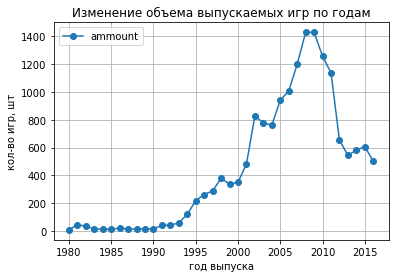

In [18]:
#построим сводную таблицу с указанием года и кол-вом выпущенных в этот год игр
games_per_year = data_games.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
games_per_year.columns = ['ammount']

#постоим линейный график по таблице games_per_year
games_per_year.plot(y='ammount', title="Изменение объема выпускаемых игр по годам", style='o-', grid=True)
plt.ylabel("кол-во игр, шт")
plt.xlabel("год выпуска");

На полученном графике четко прослеживается тенденция роста количества выпускаемых игр до 2009 года. При этом до 1993 года включительно выпускалось крайне маленькое кол-во игр, не превышающее 60 шт в год. Период с 1994 по 2006 гг можно охарактеризовать медленным, но стабильным, ростом объема выпускаемой продукции. Расцвет игровой индустрии приходится на период с 2006 по 2011 годы, когда каждый год в свет выходило более 1000 новых компьютерных игр.
Однако, уже в 2009 году производственные темпы начинают замедляться, наблюдается резкий спад в количестве выпускаемый продукции. 

Вероятно, такая ситуация обусловлена экономической обстановкой в мире - финансовым кризисом 2008 года, который критически сказался на сфере компьютерных игр и игрового оборудования. По ряду причин, включая потерю компаниями большого числа инвесторов, сокращения рабочих мест, падение спроса на игровые консоли и последующее снижение их производства, объемы производимых компьютерных игр так же начинают идти на спад. И 
уже к 2012 году количество выпускаемых в год игр составляет около 650 шт - лишь половину от объема игр, выпущенных в период расцвета. 

Далее этот показатель остается стабильным до настоящего времени, и составляет 500-600 игр в год.

Учитывая тот факт, что с 1980г до 2009г, почти 30 лет, на игровом рынке наблюдалась тенденция по увеличению кол-ва выпускаемых игр, а после критического для игровой индустрии 2008 года мы наблюдаем обвал объемов производства игр, когда за три года показатели упали в 2 раза и продолжают снижаться до настоящего момента, логично предположить, что данные за весь указанный в таблице временной период не могут представлять для дальнейшего исследования одинаковую важность. 

Ориентироваться на период, когда количество игр стабильно росло будет неверно, ведь ситуация в корне изменилась с 2009 года. Кроме того, за последние 5 лет не наблюдалось тенденции к увеличению объема продаж, а значит, прогноз, построенные на основе анализа таких данных будет неверным. Таким образом, период до 2009 года не представляет для нашего исследования важности.

Однако, несмотря на то, что в 2009 году начался спад в объемах производства, до 2012 года на рынке все еще появлялось большое количество компьютерных игр - более 1000 в год. Эти данные так же не могут представлять для нас интереса в контексте построения прогнозов, так как с 2012 года (а это 5 лет на настоящий момент) наблюдается иная ситуация на игровом рынке, которая значительно отличается от вышеуказанных цифр, и составляет всего 500-600 игр в год.

Таким образом, можно логично определить, что важность для нас представляет только период с 2012 по 2016 год, когда объемы выпускаемых игр относительно стабильны и не превышают полумиллиона шт ежегодно.

Из полученных данных можно сделать вывод, что объем выпускаемых компьютерных игр не стабилен на протяжении всего времени с момента их популяризации. На линейном графике изменения кол-ва игр за каждый год можно отметить периоды постепенного роста их числа, резкого скачка в объемах выпускаемой продукции, а затем - заметного спада. В связи с чем, появляется необходимость исключить из анализа устаревшие данные, которые могут исказить исследование и стать причиной неверных прогнозов из-за своей неактуальности.

Учитывая изменения в объеме выпуска компьютерных игр в мире, наиболее целесообразно для анализа данных рассматривать только информацию за 2012-2016 года. Так как прогнозы, ориентированные на периоды роста объемов выпуска игр или на пиковые значения, в 1-1,5 тысячи шт, более ранних периодов приведут к заведомо провальной маркетинговой кампании в условиях современных мировых реалий.

Именно этот период мы будем рассматривать для дальнейшего исследования.


### 3.2 Определение актуальных игровых платформ <a class="anchor" id="3.2"></a>

Посмотрим, как менялись продажи по платформам, и изучим их популярность в течении времени.

In [19]:
#построим сводную таблицу с указанием названия платформы и суммарными продажами по годам
#и отсортируем таблицу по убыванию кол-ва продаж
(
   data_games
   .pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum') 
   .sort_values('total_sales', ascending=False)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Среди всех игровых платформ выделяются явные лидеры по кол-ву проданных игр - это консоли PS2, X360, PS3, Wii, DS и PS. Посмотрим, как распределяются продажи по годам для этих лидеров.

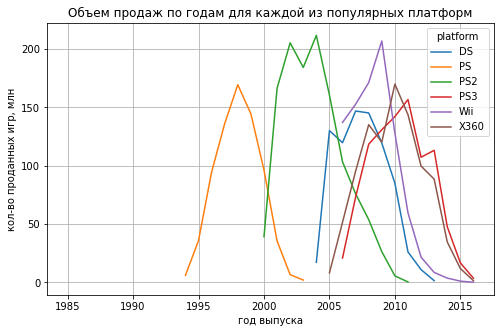

In [20]:
#создадим список платформ-лидеров
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

#построим графики продаж по годам для каждой из популярных платформ
(
    data_games.query('platform == @platforms')
    .pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
    .plot(title='Объем продаж по годам для каждой из популярных платформ', grid=True, figsize=(8,5))
)
plt.ylabel("кол-во проданных игр, млн")
plt.xlabel("год выпуска");
plt.show()

На полученном графике четко прослеживается интересная закономерность - у игровой платформы "срок жизни" ограничен и, чаще всего, составляет около 10 лет. Другими словами, даже самые популярные платформы, продажи игр на которых составляли сотни миллионов, теряют актуальность через 9-12 лет с момента выхода на рынок.

При этом, характерный жизненный цикл игровой консоли включает период достаточно стремительного роста популярности, период расцвета, который длится 2-3 года, и за ним такой же стремительный спад популярности.

В связи с этим, очевидно, что брать для исследования данные по всем платформам не имеет смысла, так как на настоящий момент многие игровые могли потерять свою актуальсть, игры для них перестали выпускать, а следовательно, они не смогут представлять интерес для продавца компьютерных игр.

Таким образом, имеет смысл оставить в таблице данные только по тем игровым платформам, для которых продолжают выходить новые игры на актуальный период.

Отфильтруем данные по 2012-2016 годам и посмотрим, какие платформы существуют в этот период.

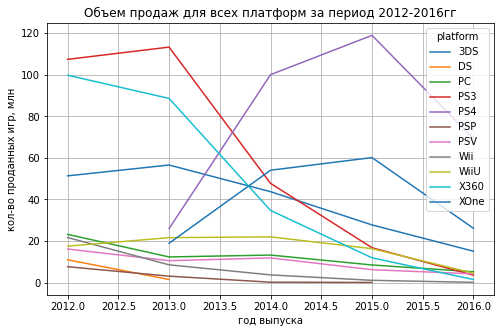

In [21]:
#делаем срез по данным, где год выпуска игры не ранее 2012
data_games_actual = data_games.query('year_of_release >= 2012')

#построим графики продаж по годам для каждой из популярных платформ
(
    data_games_actual
    .pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
    .plot(title='Объем продаж для всех платформ за период 2012-2016гг', grid=True, figsize=(8,5))
)
plt.ylabel("кол-во проданных игр, млн")
plt.xlabel("год выпуска");
plt.show()

#data_games_actual.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')

На графике хорошо заметно, что даже за период в 4 года картина на игровом рынке значительно поменялась. Несколько консолей к 2016 году закончили или практический подошли к концу своего жизненного цикла (DS, PSP, Wii), некоторые консоли потеряют актуальности через 1-2 года (X360, PS3).

Но так же появились и новые игровые платформы (PS4, XOne), которые успели проти через пик своей актульности всего за 3 года.

В связи с чем, можно сделать вывод, что выявленные актуальный период в 4 года, 2012-2016 года, слишком велик и не позволит сделать корректные прогнозы. Сократим временной промежуток в два раза, взяв данные за 2014-2016 года и оставив 6 потенциально интересных платформ, и еще раз оценим динамику продаж.

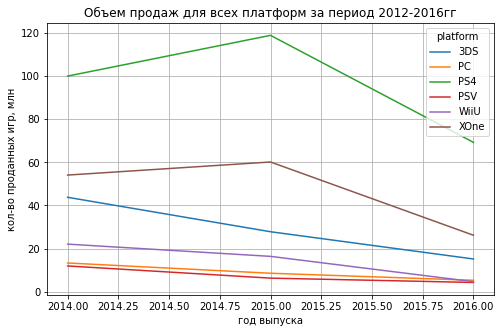

In [22]:
#создадим список актуальных игровых платформ
names = ['3DS', 'PC', 'PS4', 'PSV', 'XOne', 'WiiU']

#создадим срез данных по заданным условиям
data_games_actual = data_games_actual.query('year_of_release >= 2014 and platform in @names')

#повторим графики продаж по годам для каждой из актуальных платформ
(
    data_games_actual
    .pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
    .plot(title='Объем продаж для всех платформ за период 2012-2016гг', grid=True, figsize=(8,5))
)
plt.ylabel("кол-во проданных игр, млн")
plt.xlabel("год выпуска");
plt.show()


Теперь отчетливо выделяются платформы, лидирующие по кол-ву проданных для них игр. Самые высокие объемы за последние два года показывает PS4, и, несмотря но то, что за год продажи упали почти вдвое (с цифры в 120 млн в 2015 году до 70 млн в 2016) можно с уверенностью утверждать, что еще минимум год платформа будет популярна.

Продажи для консоли XOne так же переживали пик в 2015 году, составляя 60 млн, и в текущий момент идут на спад. Но, аналогично PS4, даже при условии сохранения темпов уменьшения объема продаж, на следующий год актуальность платформы должна сохраниться.

Платформа 3DS не может сравнится  объемами проданных игр с вышеописанными конкурентами, однако темпы спада ее популярности намного ниже, что дает право предположить, что ее так же целесообразно рассматривать в перспективе следующего года.

Показатели объема продаж по платформам PC и PSV сохраняют стабильность, снижение идет очень медленно и плавно. Повода считать, что в следующем году что-то изменится, и платформы резко потеряют актуальность - нет.

Самой сомнительной в плане перспектив является платформа WiiU. Несмотря на то, что продажи игр для нее за 2 года выше, чем эти же показатели для PC и PSV, но здесь можно заметить стабильно активное уменьшение их объемом. Что говорит о том, что количество проданных для нее игр в новом году, с большой вероятностью, окажутся ниже.

Исключим эту платформу из таблицы, оставив только 5 актуальных платформ, по которым будем проведить дальнейшее исследование.

In [23]:
#удалим из таблицы данные по платформе WiiU
data_games_actual = data_games_actual.query('platform !="WiiU"')

Полученные в ходе исследования результаты показали, что любая игровая платформа имеет ограниченный срок жизни, при этом за свой жизненный цикл она проходит стадии активного роста своей популярности, период расцвета, в котором наблюдаются максимальные объемы прождаж, и неизменный спад популярности. В большинстве случаев характерный период жизни одной платформы охватывает 9-11 лет.

Таким образом, анализировать весь объем имеющихся данных является нецелесообразным, так как ситуация на игровом рынке меняется осень стремительно. В связи с этим, актуальный временной период был уменьшен в два раза и составляет 2014-2016 гг, а так же были определены пять наиболее перспективных на 2017 год платформ. Среди них оказались '3DS', 'PC', 'PS4', 'PSV' и 'XOne'.

### 3.3 Исследование продаж внутри платформ <a class="anchor" id="3.3"></a>

Построим график распределения по глобальным продажам игр в разбивке по платформам.

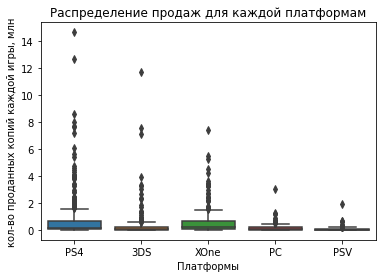

In [24]:
#построим диаграмму размаха для каждой платформы
sns.boxplot(data=data_games_actual, x='platform', y='total_sales')
plt.xlabel("Платформы")
plt.ylabel("кол-во проданных копий каждой игры, млн")
plt.title('Распределение продаж для каждой платформам');

На полученном графике отчетливо видно выбросы - нетипичные значение, но трудноразличимы основные данные по каждой платформе. Изменим масштабы диаграммы, что бы рассмотреть основные значения по продажам игр.

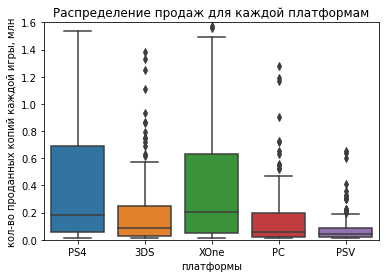

In [25]:
#зададим ограничение по оси y, равное 1,5
sns.boxplot(data=data_games_actual, x='platform', y='total_sales')
plt.xlabel("платформы")
plt.ylabel("кол-во проданных копий каждой игры, млн")
plt.title('Распределение продаж для каждой платформам')
plt.ylim(0, 1.6);

Исходя из полученных данных можно сделать вывод, что за последние 2 года объем продаж большинства игр не превышал 1,5 миллиона копий в год для платформ PS4, XOne и WiiU. При этом, основная часть игр продавалась в количестве от 50 тыс до 700 тысяч копий в год, средний же показатель для кажой игры - около 200 тыс.
Для платформ 3DS, PC и PSV показатели еще ниже. Здесь основной процент игр расходился тиражами не более 250 тыс копий.

Однако, можно так же заметить, что среди игр на каждой платформе есть особо популярные экземляры, продажи которых выбиваются из общего числа и превышают 2 миллионов копий в год. На графике так же присутствуют единичные хиты (около 10 игр), завоевавшие огромную популярность, их продажи насчитывают от 7 до 14 млн копий в год.

Изучим продажи игр внутри самой популярной на настоящий момент платформы, PS4, и посмотрим, как влияют на продажи отзывы пользователей и критиков.

Платформа PS4


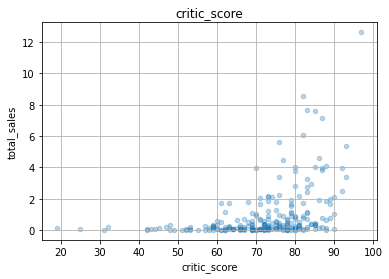

Коэффициент корреляции: 0.4


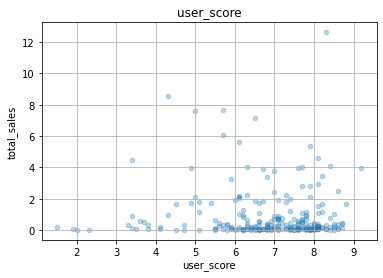

Коэффициент корреляции: -0.04


In [26]:
#для исследования взаимосвязи исключим значения с заглушками
data_games_actual_filt = data_games_actual.query('critic_score != -1 and user_score != -1')

#построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами
print('Платформа PS4')
for score in ['critic_score', 'user_score']:
    (
        data_games_actual_filt.query('platform == "PS4"')
        .sort_values(by='total_sales')
        .plot(x=score, y='total_sales', kind='scatter', title=score, grid=True, alpha=0.3)
    )
    plt.show()
    print('Коэффициент корреляции:', (
        data_games_actual_filt.query('platform == "PS4"')['total_sales']
        .corr(data_games_actual_filt[score]))
        .round(2)
         )
            


По диаграмме рассеивания видно, что бОльшая часть продаваемых игр имеет оценку критиков от 50 до 85 баллов. Создается впечатление, что критики редко присваивают играм меньшее кол-во рейтинговых баллов, на диаграмме можно заметить лишь единичные значения с оценками в 19 - 50.

При этом для всех оценок от 50 дл 85 единиц объем продаж сконцентрирован в пределах миллиона копий, небольшое кол-во игр его превышает и доходит до 2 млн. Большинство игр, проданных в количестве от 2х до 13ти млн, имеют более высокие рейтинги  - от 75 до 95 баллов. Но число таких игр слишком мало, что бы можно было говорить о высокой взаимосвязи оценок критиков с продажами игр на рынке.

Скорее, по полученной диаграмме рассеивания можно говорить о средней зависимости показателей оценки критиков и продаж. Об отсутствии сильной взаимосвязи между продажами и оценками критиков так же говорит и коэффицтент Пирсона, который составляет всего 0,4.

Взаимосвязь продаж с оценками пользователей еще менее выражена. По диаграмме рассеивания видно, что основной процент игр получает оценки от 5,5 до 8,5 баллов. При этом отдельные популярные хиты, проданные тиражем в несколько миллионов, имеются и среди игр с низкой оценкой пользователя, и среди игр с высокими оценками. Коэффицтент Пирсона, -0.04,  так же свидетельствует о том, что взаимосвязь отсутствует.

Посмотрим, как обстоят дела с оценками для других платформ.

Платформа 3DS
Коэффициент корреляции: critic_score 0.28
Коэффициент корреляции: user_score 0.28


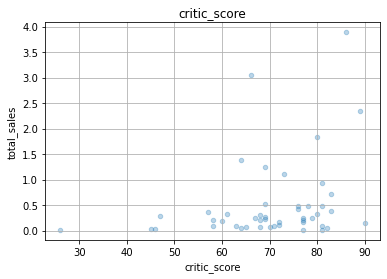

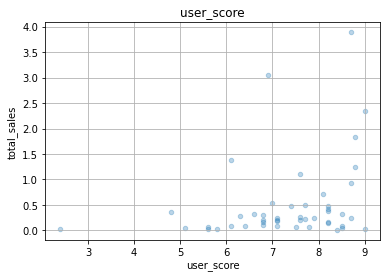

--------------------------------
Платформа PC
Коэффициент корреляции: critic_score 0.17
Коэффициент корреляции: user_score -0.09


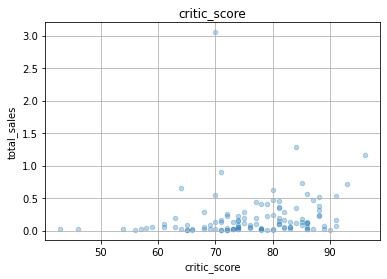

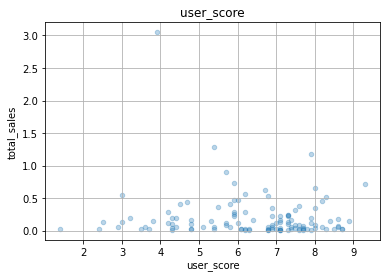

--------------------------------
Платформа PSV
Коэффициент корреляции: critic_score 0.04
Коэффициент корреляции: user_score 0.02


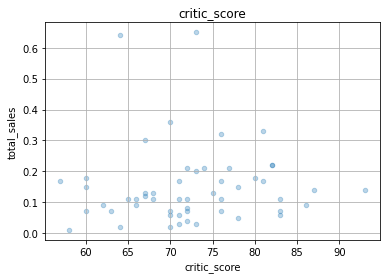

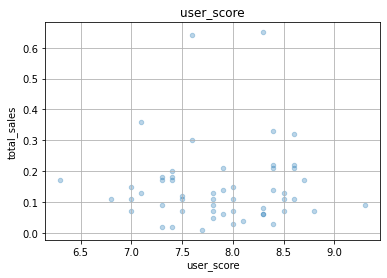

--------------------------------
Платформа XOne
Коэффициент корреляции: critic_score 0.42
Коэффициент корреляции: user_score -0.09


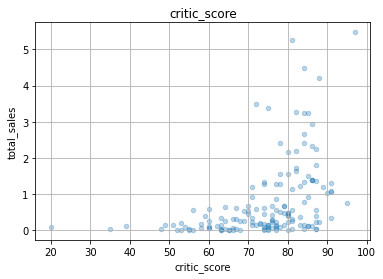

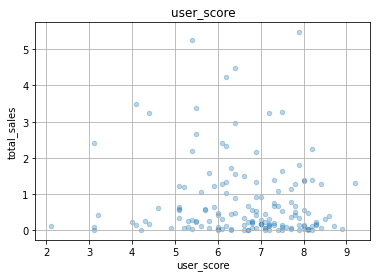

--------------------------------


In [27]:
for name in ['3DS', 'PC', 'PSV', 'XOne']:
    print("Платформа", name)
    
    for score in ['critic_score', 'user_score']:
        print('Коэффициент корреляции:', score, (
        data_games_actual_filt.loc[data_games_actual_filt['platform'] == name]['total_sales']
        .corr(data_games_actual_filt[score]))
        .round(2)
         )
        (
        data_games_actual_filt.loc[data_games_actual_filt['platform'] == name]
        .sort_values(by='total_sales')
        .plot(x=score, y='total_sales', kind='scatter', title=score, grid=True, alpha=0.3)
    )
    plt.show()
    print('--------------------------------')
   


Как видно из построенных диаграм, ситуация для остальных платформ схожа c ситуацией для платформы PS4. Оценки критиков крайне редко имеют значения ниже 50, а оценки пользователей - менее 5.

При этом, консоли PC и PSV имеют наиболее близкий к 0 коэффициент Пирсона, и наименее выраженную взаимосвязь между любыми оценками и объемом продаж. А платформа XOne - наиболее близкий к коэффициенту платформы PS4, 0.4,  и похожее распределение значений: основной процент игр продается в количестве, непревышаемом 1 миллион копий. И лишь единичные экзампляры были проданы в кол-ве нескольких миллионов, они, так же как и на PS4, имеют рейтинги от 70 до 90.

Объемы продаж большинства игр за последние два года не превышает миллиона копий в год. В этот период так же было выпущено небольшое количество особо популярных игр, продажи которых сильно превышают обычные показатели и составляют несколько миллионов. Однако, это, скорее, единичные хиты, которые стали исключением.

Так же, исследование показало, что, при наличии, оценки критиков варьируются в диапозоне от 50 до 90 баллов, а пользователи редко оценивают игры ниже 5 баллов. При этом, для платформ PS4 и XOne можно говорить о средней взаимосвязи между оценками критиков и объемом продаж игр (коэффицент корреляции этих показателей составляет 0.4), в то время , как для остальных платформ оценки критиков не оказывают существенного влияния на принятие решения о покупке той или иной игры. Так же как и оценки пользователей, что справедливо для любой из пяти актуальных платформ.

### 3.4 Исследование популярности жанров <a class="anchor" id="3.4"></a>

Изучим общее распределение игр по жанрам за последние 2 года: посморим на количество выпущенных игр, объемы продаж по каждому жанру и среднее количество проданных копий для игр в каждом жанре.

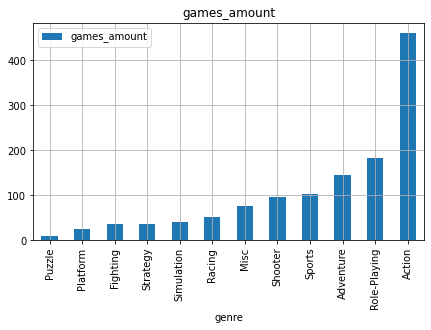

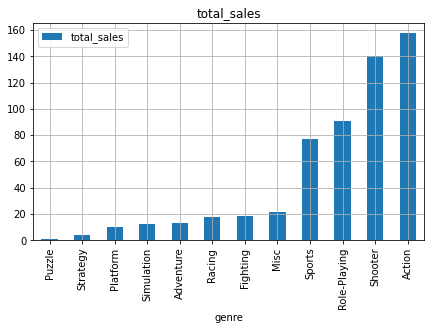

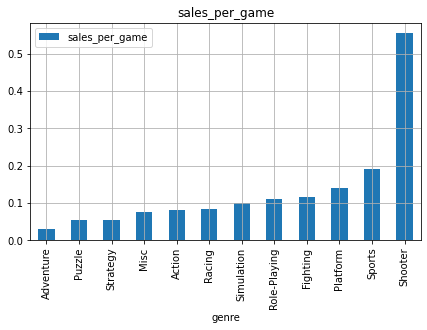

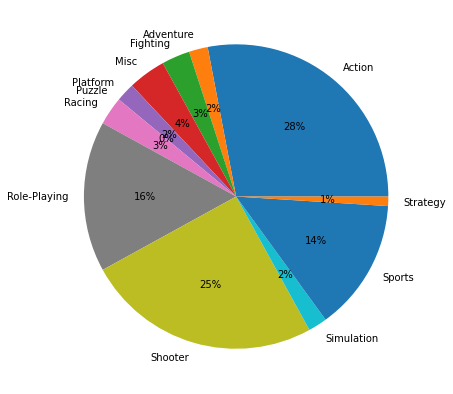

In [28]:
#построим сводную таблицу с указанием кол-ва игр по каждому жанру, кол-во проданных игр 
#и медианное значение по кол-ву продаж каждой игры в жанре
game_genres = (
               data_games_actual
              .pivot_table(index='genre', values='total_sales', aggfunc=['count','sum', 'median'])
              .reset_index()
)
#изменим названия cтолбцов 
game_genres.columns = ['genre', 'games_amount', 'total_sales', 'sales_per_game']

#добавим столбец с процентным отношение продаж по жанру к общему кол-ву продаж
game_genres['proportion'] = (game_genres['total_sales'] / (game_genres['total_sales'].sum())).round(2)

#построим столбчатые диаграммы по каждому столбцу games_amount, total_sales, sales_per_game
for name in game_genres.columns[1:-1]:
    game_genres.sort_values(by=name).plot(
    kind='bar',
    x='genre',
    y=name,
    title=name,
    grid=True,
    figsize=(7,4)
    );

#построим круговую диаграмму по процентному соотношению
fig = plt.figure(figsize =(7, 7)) 
plt.pie(data=game_genres, x=game_genres['proportion'], labels =game_genres['genre'], autopct='%1.0f%%', normalize=False);

Наиболее популярным жанром для компьютерных игр, судя по графикам, является жанр Action. Продажи игр в жанре Action составляют 28% от объема продаж всех игр. Кол-во выпущенных игр этого жанра так же наибольшее - 460 шт. за 2 года. Однако, можно заметить, что средние значения продаж по каждой игре отдельно невелики и не доходят даже до 100000 копий. Таким образом, можно сказать, что жанр action "берет количеством", т.е. объемы продаж игр по этому жанру формируется не успешностью каждой игры, а их количеством.

Второй по объему продаж на игровом рынке - жанр Shooter, который заполняет 25% игрового рынка, при том, что игр в этом жанре было выпущено значительно меньше - не более 100 шт. Причиной такого высоко объема продаж может стать выброс - то есть единичная супер популярная игра с большим кол-вом проданный копий, но по среднему значению продаж каждой игры мы видим, что оно намного выше аналогичного показателя в жанре action. Здесь каждая игра продается, в среднем, в количестве более полумиллиона, а значит, игры этого жанра можно назвать более популярными и успешными.

Более мелкими, но все еще весомыми игроками на игровом рынке являются жанры Role-Playing, 16% от общего объема продаж, и Sports 14%. При этом игр в жанре Role-Playing было выпущено почти в два раза больше, чем спортивных игр. А показатель среднего кол-ва продаж по каждой игре у Sports достигает почти 200 тысяч, а у Role-Playing - в два раза меньше, всего 110000 копий в год.

Остальные жанры имеют достаточно низкие показатели по продажам и составляют от 1 до 4% общего объема.

Таким образом, можно сделать вывод, что высокого показателя по общим продажам для игры определенного жанра не достаточно для определения ее успешности. Так как высокие объемы продаж могут быть обусловлены большим количеством игр этого жанра, выпущенных на рынок, а не успешностью этих игр.
Об успешности и популярности игры лучше судить в разрезе средних(с матем.точки зрения - медианного) значений по количеству глобальных продаж на каждую игру.

Ориентируясь на эти показатели, можно сказать, что лидер по популярности - игры в жанре Shooter, где каждая игра, в среднем, находит не менее полумиллиона покупателей.

К жанрам со средними показателями, от 200 до 100 тыс копий. в год, можно отнести по порядку убывания популярности - Sports, Platform, Fighting, Role-Play и Simulation.

Игры, которые пользуются наименьшей популярность, продажи не превышают 100 тыс копий в год, выпускаются в жанрах Racing, Action, Misc, Strategy, Puzzle и Adventure.

### 3.5 Вывод <a class="anchor" id="3.5"></a>

В ходе исследовательского анализа был определен актуальный временной период для дальнейшего исследования - данные за 2012-2016 гг. В связи с тем, что  ситуация на игровом рынке меняется очень стремительно, анализировать весь объем имеющихся данных является нецелесообразным.

Так же были определены пять наиболее перспективных на 2017 год платформ. Среди них оказались '3DS', 'PC', 'PS4', 'PSV' и 'XOne'. Остальные игровые платформы либо утратили свою популярность, и на 2016 год для них уже не было выпущено ни одной игры, либо еще актуальны, но подходят к концу своего жизненного цикла. Учитывая, что каждая популярная игровая платформа имеет средний срок жизни около 9-11 лет, брать в исследование данные по платформам, продажи которых стремительно идут на спад, не является целесообразным.
 
Кроме того, были исследованы взаимосвязи между оценками критиков/пользователей и популярностью игр. Полученные результаты показали отсутствие сильно выраженных связей между этими показателями.

Среди игровых жанров самым популярным оказался жанр Shooter. Игры в жанре Shooter расходятся, в среднем, в количестве около полумиллиона копий. Следующими в ряду по популярности стоят игры в жанрах Sports, Platform, Fighting, Role-Play и Simulation. Здесь среднее количество проданных копи каждой игры составляет 100-200 тысяч копий. Наименьшей популярностью пользуются жанры Racing, Action, Misc, Strategy, Puzzle и Adventure, продажи игр, выпускаемых в этих жанрах, не превышают 100 тыс копий в год.

При этом, нужно учитывать, что судить о популярности игр определенного жанра в разрезе количества общих продаж не совсем объективно. Так как высокие объемы продаж могут быть обусловлены большим количеством игр этого жанра, выпущенных на рынок, а не успешностью этих игр. В связи с чем, данные об успешности и популярности игры представлены по средним значениям продаж на каждую игру.

## 4. Портрет пользователя каждого региона  <a class="anchor" id="4"></a>

### 4.1 Изучение особенностей регионов  <a class="anchor" id="4.1"></a>

При рассмотрении имеющихся данных можно заметить, что одна и та же игра в разных регионах мира имеет разную популярность: в Европе и Америке игра может быть продана в количестве несколько миллионов копий, в то время, как в Японии этот показатель едва достигает 100000. Причина такой ситуации - различия в предпочтениях жителей этих регионов. 

Рассмотрим каждый регион отдельно и определим особенности в предпочтениях у пользователей каждого региона.
сначала изучим популярность игровых платформ в разных регионах.

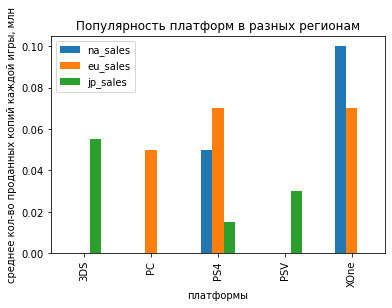

In [29]:
#построим для каждого региона сводную талицу с медианными значениями продаж по каждой игре
pivot_na_sales = data_games_actual.pivot_table(index='platform', values='na_sales', aggfunc='median')
pivot_eu_sales = data_games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='median')
pivot_jp_sales = data_games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='median')

#объединим полученные данные в одну таблицу и построим столбчатую диаграмму
pivot_na_sales.join([pivot_eu_sales, pivot_jp_sales]).reset_index().plot(x="platform", kind='bar')
plt.xlabel("платформы")
plt.ylabel("среднее кол-во проданных копий каждой игры, млн")
plt.title('Популярность платформ в разных регионам');

Запад и Восток - как два разных мира. Это утверждение абсолютно точно описывает ситуацию на полученном графике, где отчетливо видна разница в предпочтениях по игровым платформам в разных регионах мира. 

В Северной Америке пользователи предпочитаю платформы PS4 и XOne. Игры на этих платформах имеют, в среднем, наибольший объем продаж,  в то время, как игры на остальных платформах имеют крайне низкие продажи, неотражающиеся на графике.

В Стране Восходящего Солнца ситуация противоположная. Игры на платформах PS4 и XOne пользуются крайне низким спросом, а основной процент продаж идет с платформ 3DS и PSV.

Страны Европы по своим предпочтениям ближе к пользователям из Северной Америке. PS4 и XOne здесь так же в явных лидерах. Кроме того, европейцы не обходят сторойно игры, выпущенные для персональных компьютеров(PC).

Посмотрим на жанровые предпочтение у пользователей из каждого региона.

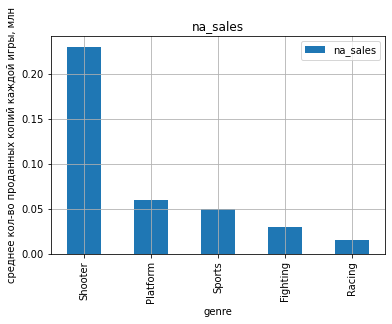

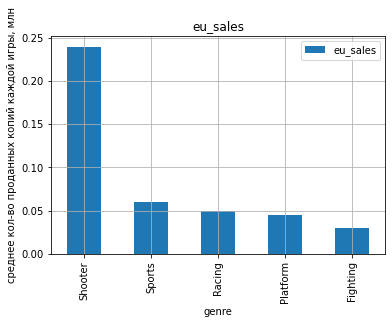

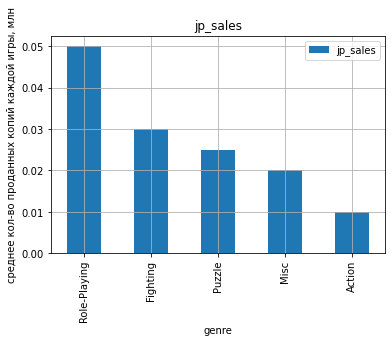

In [30]:
#построим для каждого региона сводную талицу с медианными значениями продаж по каждой игре по жанрам 
#отсортируем таблицу по убыванию значений и построим диаграмму по первым пяти

for region in['na_sales', 'eu_sales', 'jp_sales']:
    (
        data_games_actual
        .pivot_table(index='genre', values=region, aggfunc='median').reset_index()
        .sort_values(by=region, ascending=False)[:5]
        .plot(kind='bar', x='genre', y=region, title= region, grid=True)  
    )
    plt.ylabel("среднее кол-во проданных копий каждой игры, млн");

По полученным результатам можно еще раз убедиться, что пользователи из Северной Америки и Европы очень похожи в своих предпочтениях. Как и с выбором игровых платформ, выбор наиболее интересных жанров для этих регионов совпадает. В ТОП-5 популярных жанров здесь попадают жанры Shooter, Sports, Racing, Platform и Fighting. Причем Shooter'ы лидируют в обоих регионах с большим отрывом от других жанров, имея около 250000 проданных копий каждой игры. В отношении остальных членов пятерки лидеров распределение предпочтений немного отличается, однако в обоих регионах средний объем продаж по каждой игре не превышает 60000 копий.

Совершенна непохожая ситуация складывается на игровом рынке в Японии. Здесь самыми популярными жанрами являются Role-Playing, Fighting, Puzzle, Misc и Action. При этом разрыв между показателями по каждому жанру примерно одинаковый.

Оценим влияние рейтинга организации ESRB на принятие решения о покупке игр в каждом регионе.

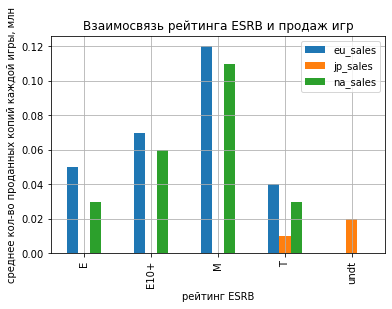

In [31]:
#построим графики и посмотрим взаимосвязь рейтинга и продаж игры
(
data_games_actual
.pivot_table(index='rating', values=(['na_sales', 'eu_sales', 'jp_sales']), aggfunc='median')
.reset_index()
.plot(x="rating", kind='bar', grid=True)
)
plt.ylabel("среднее кол-во проданных копий каждой игры, млн")
plt.xlabel("рейтинг ESRB")
plt.title("Взаимосвязь рейтинга ESRB и продаж игр");

Как видно на графике, японские пользователи крайне редко интересуются рейтингом ESRB, большинство продаваемых здесь игр не имеют вышеуказанного рейтинга. Это вполне объяснимо - в Японии существует своя система возрастных рейтингов и своя организация, отвечающая за их определение. 

В Северной Америке и странах Европы рейтинг организации ESRB более уважаем и является дополнительным критерием для пользователя при выборе игры. Абсолютное большинство проданных здесь игр имеет знак одной из возрастных категорий, в то время, как игры, не имеющие рейтинга, крайне непопулярны.

### 4.2 Вывод  <a class="anchor" id="4.2"></a>

По полученным данным можно утверждать, что портрет пользователя в Японии значительно отличается от портрета пользо
вателей двух других регионов. Наиболее популярными игровыми консолями здесь являются платформы 3DS и PSV. Среди самых любимых жанров можно выделить Role-Playing, Fighting, Puzzle, Misc и Action, а рейтинг игры от организации ESRB, при этом, не имеет для японцев значения.

Игроки в Северной Америке имеют иные предпочтения, схожие с игроками из европейских стран. Абсолютным лидером среди игровых жанров в этих регионах является жанр Shooter, далее по популярности идут жанры Sports, Racing, Platform и Fighting. При этом, здесь ценятся игры на платформах PS4 и XOne с определенными рейтингами ESRB.
Для европейских пользователей так же актуальны игры для персонального компьютера (PC).

## 5. Проверка гипотез <a class="anchor" id="5"></a>

Изучим рейтинги платформ и жанров, сравним средние пользовательские оценки и проверим две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров "Action" и "Sports" разные.

**Проверим первау гипотезу.**

Сформулируем статистические гипотезы следующим образом.


Нулевая гипотеза:
**"Средние пользовательские рейтинги платформ Xbox One и PC равны"**.

Так как нам не важна разница в рейтингах, а интересует именно равенство между показателями, альтернативная гипотеза будет звучать следующим образом: 
**"Средние пользовательские рейтинги платформ Xbox One и PC не равны"**.

In [32]:
#импортируем библиотеку
from scipy import stats as st

#зададим критический уровень статистической значимости
alpha = 0.05 


results = st.ttest_ind(
    data_games_actual.query('platform == "XOne" and user_score != -1')['user_score'], 
    data_games_actual.query('platform == "PC" and user_score != -1')['user_score'],
    equal_var = False
    )

print('p-значение:', results.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Согласно полученным результатам, учитывая уровень значимости 5%, оснований отвергнуть нулевую гипотезу в пользу альтернативной нет.
    
Мы можем сказать, что наша первая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась.

**Проверим втораю гипотезу.**

Сформулируем статистические гипотезы следующим образом.

Нулевая гипотеза: **"Средние пользовательские рейтинги жанров Action и Sports равны".**

Аналогично первой гипотезе, нас не интересует разница в рейтингах, поэтому альтернативная гипотеза будет сформулирована следующим образом: **"Средние пользовательские рейтинги жанров Action и Sports не равны"**

In [33]:
results = st.ttest_ind(
    data_games_actual.query('genre == "Sports" and user_score != -1')['user_score'], 
    data_games_actual.query('genre == "Action" and user_score != -1')['user_score'],
    equal_var = False
    )

print('p-значение:', results.pvalue)

#сравним получившееся p-значение с заданным уровнем статистической значимости
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.1668116215949855e-08
Отвергаем нулевую гипотезу


По полученным результатам нам не удалось подвердить нулевую гипотезу. В связи с чем мы отклоняем нулевую гипотезу о равенстве рейтингов жанров Sport и Action в пользу выдвинутой альтернативной гипотезы.

Таким образом, можно утверждать, что наша вторая проверяемая гипотеза "Средние пользовательские рейтинги жанров "Action" и "Sports" разные" так же подтвердилась.

### 5.1 Вывод <a class="anchor" id="5.1"></a>

Для проверки двух гипотез "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров "Action" и "Sports" разные" мы использовали t-тест для сравнения средних двух независимых друг от друга совокупностей.

В связи с тем, что нулевая гипотеза всегда формируется так, что бы все данные лежали в районе изначально предполагаемого значения, то есть с использованием знака равенства, то в обоих наших случаях нулевые гипотезы звучали как "Средние пользовательские рейтинги равны".

При этом, при проверке первой гипотезы нулевая статистическая гипотеза не была отвергнута. Что говорит о том, что наша гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтверждается.

Во втором же случае мы отвергли нулевую гипотезу о равенстве рейтингов в пользу альтернативной статистической гипотезы, которая звучала как "Средние пользовательские рейтинги жанров Action и Sports не равны". Что так же говорит о том, что наша вторая гипотеза подтвердилась.

## 6. Итоги исследования <a class="anchor" id="6"></a>

Нами были изучены данные о компьютерных играх за период с 1980х до 2016 года, взятые из открытых источников.

В ходе исследования мы:
- определили актуальный для анализа временной период;
- определили список актуальных на исследуемый период времени игровых платформ;
- проанализировали особенности продаж внутри каждой платформы;
- выявили наиболее популярные жанры игр;
- описали портрет пользователя в каждом из регионов продаж;
- проверили заявленные гипотезы.

Изучение полученных данных показало, что любая из игровых консолей имеет ограниченный жизненный срок. Даже если платформа была особо популярна среди пользователей и производителей игр, срок популярности, а другими словами - срок ее жизни, составляет в среднем 9-12 лет. Единственный "долгожитель" среди всех изученных игровых платформ - персональный компьютер, который не теряет актуальности с момента массовой популяризации.

Кроме того, ***ситуация на игровом рынке так же меняется достаточно стремительно***, и одни и те же показатели одного года могут критически отличаться от аналогичных показательный спустя всего один год.

Так, период с 1980 по 1990 гг характеризуется отсутствием какой-либо динамики в объемах выпускаемых компьютерных игр, с 1990 года этот показатель плавно начинает расти, а в 2000 - наблюдается резкий скачок, за которым последовал активный рост числа выпускаемых игр. Расцвет игровой индустрии приходится на период с 2006 по 2011 годы, когда каждый год в свет выходило более 1000 новых компьютерных игр. 

Однако, экономический и финансовый мировые кризисы 2008 года не обошли стороной и это направление. Уже в 2009 году начинается достаточно быстрый спад в объемах выпускаемой продукции, и всего за три года, к 2012 году, количество выпускаемых игр составляло всего лишь половину от былого объема. Цифра в 500-600 игр в год актуальна для всего периода 2014-2016 гг.

***Учитывая жизненный срок игровых платформ и темпы изменений на игровом рынке,  наиболее целесообразно для анализа данных рассматривать только информацию за 2014-2016 года. В противном случае, прогнозы, сформированные на данных за более ранний период времени, могут привести  приведут к заведомо провальной маркетинговой кампании в условиях современных мировых реалий.***

Исследование последних трех лет так же показало, что эпоха игровых консолий уходит в прошлое. Уже сейчас на игровом рынке нет игровых платформ, которые находятся на стадии наращивания объемов продаж по играм для них. Существующие на настоящий момент платформы, WiiU, 3DS, PC, PS4, PSV и XOne, уже перешагнули свой пиковый этап, когда объемы продаж игр составляли несколько десятков тысяч, и находятся на пути к завершению своего жизненного цикла. Из них только 5 платформ можно рассматривать как потенциально прибыльные на будущий 2017 год. Это 3DS, PC, PS4, PSV и XOne. Платформа WiiU, с большой вероятность, проживет еще 1-2 года. Но прогнозируемые объемы продаж игр для нее не представляют дальнейшего интереса.

Если рассматривать продажи игр за актуальный период внутри каждой из платформ, то можно сказать, что <span style="color:orange">**объемы продаж большинства игр за последние два года не превышает 1.5 миллиона копий в год**</span>. В этот период так же было выпущено небольшое количество особо популярных игр, продажи которых сильно превышают обычные показатели и составляют несколько миллионов. Однако, это, скорее, единичные хиты, которые стали исключением.

Так же, исследование показало, что, при наличии, оценки критиков варьируются в диапозоне от 50 до 90 баллов, а пользователи редко оценивают игры ниже 5 баллов. При этом, для платформ PS4 и XOne можно говорить о средней взаимосвязи между оценками критиков и объемом продаж игр (коэффицент корреляции этих показателей составляет 0.4), в то время , как для остальных платформ оценки критиков не оказывают существенного влияния на принятие решения о покупке той или иной игры. Так же как и оценки пользователей, что справедливо для любой из пяти актуальных платформ.

Для определения наиболее популярных среди пользователей жанров нам потребовалось сравнить средние показататели по продажам каждой игры внутри исследуемого жанра. 

Таким образом, 
- наиболее успешным стал жанр <span style="color:orange">**Shooter**</span>, где средний показатель продаж по каждой игре составил <span style="color:orange">**около 500000 копий**</span>. 
- к жанрам со средними объемами продаж, <span style="color:orange">**от 200 до 100 тыс копий**</span> в год, можно отнести по порядку убывания популярности - <span style="color:orange">**Sports, Platform, Fighting, Role-Play и Simulation**</span>
- игры, которые пользуются наименьшей популярность, продажи <span style="color:orange">**не превышают 100 тыс копий**</span> в год, выпускаются в жанрах <span style="color:orange">**Racing, Action, Misc, Strategy, Puzzle и Adventure**</span>. 

Кроме того, важно отметить, что о популярности и успешности жанра не стоит судить по общему количеству проданных игр. Ведь даже одна игры, сильно выбивающаяся по популярности, может исказить результат исследования. Так же, причиной большого количества проданных игр может стать тот факт, что игр в данном жанре, в приниципе, выпускается значенительно больше, чем игр в других жанрах. Однако, не всегда количество говорит о том, что игры пользуются польшой популярностью.

Так, игры жанра Action составляют 28% от общего объема продаж именно за счет кол-ва выпущенных на рынок игр, в то время, как каждая из них расходится в кол-ве не более 100000 копий.

Нами так же были ***выявлены важные отличия портретов пользователей в странах Европы и Америки и пользователей из Японии.*** 

Отличия заключаются в разных предпочтениях по игровым плвтформам: 3DS и PSV - для Японии, и PS4 и XOne - для жителей Северной Америки и Европы.

При этом жанры, популярные в Японии - это Role-Playing, Fighting, Puzzle, Misc и Action, в то время, как оба других региона предпочитают жанры Shooter, Sports, Racing, Platform и Fighting. Еще один важный критерий для европейцев и американцев - это волзрастной рейтинг ESRB. Дkя японских пользователей этот рецтингне не имеет значения, так как в их стране есть своя организация, определяющая возрастные рейтинги видеоирг.

Таким образом, можно сделать вывод, что <span style="color:orange">**2017-2018 года могут стать последними для существующих самостоятельных игровых платформ.**</span> Возможно, наиболее целосообразным будет постепенное смещение фокуса деятельности магазина на мобильные и сетевые компьютерные игры. Так как, даже при условии удовлетворения потребностей игроков из разных регионов мира, общий объем выпускаемых игр и продаваемых копий стабильно идет на спад. 





[К оглавлению.](#end)